# **HW 1: Exploratory Data Analysis and Dimensionality Reduction in Wine Dataset**
**HW Due date is 02/15/2024, 2:00 pm**

In this assignment, you will analyze the Wine dataset, which contains the results of a chemical analysis of wines grown in a specific region in Italy, derived from three different cultivars (classes). The dataset consists of various chemical properties present in the wines, making it suitable for classification and clustering tasks.

The goals of this assignment are to perform exploratory data analysis (EDA),handle missing data, standardize the data, and apply dimensionality reduction techniques to understand the underlying structure of the dataset.

# The Wine Dataset:`
The dataset consists of the following features:

* Alcohol: The alcohol content of the wine.
* Malic Acid: The malic acid content of the wine.
* Ash: The ash content of the wine.
* Alcalinity of Ash: The amount of ash that results after burning.
* Magnesium: The magnesium content of the wine.
* Total Phenols: The total phenolic content of the wine.
* Flavanoids: The flavonoid content of the wine.
* Nonflavanoid Phenols: The non-flavonoid phenolic content of the wine.
* Proanthocyanins: The proanthocyanin content of the wine.
* Color Intensity: The intensity of color in the wine.
* Hue: The hue of the wine.
* OD280/OD315 of Diluted Wines: The ratio of optical density measurements at 280nm and 315nm of the wine.
* Proline: The proline content of the wine.

Each row in the dataset represents a wine sample, and the target variable is the cultivar (class) of the wine. There are three classes in total, representing three different types of wines.



# Data Loading and Preprocessing:
* Load the Wine dataset into a DataFrame.
* Standardize the data: Standardize the features by subtracting the mean and dividing by the standard deviation.

In [46]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import svd

In [47]:
# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
feature_names = wine_data.feature_names

**Coding excersice:** Convert the dataset to a DataFrame and display the first few rows of the dataset.

In [48]:
# Convert the dataset to a DataFrame
## Your code starts here
df = pd.DataFrame(data=X, columns=feature_names)
## Your code ends here

# Display the first few rows of the dataset
## Your code starts here
df.head()
## Your code ends here

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Data Quality Issues:
We artificially impose the following data quality issues to the original dataset. Then use the mean, median and iterative methods to recover the missing values and calculate the mean square error!

**Note:** You need to import IterativeImputer module from fancyimpute library. You might need to run "pip install fancyimpute"

**Note:**
'*SimpleImputer*' is a class provided by scikit-learn for handling missing values in datasets. It provides a simple strategy to impute missing values using the mean, median, most frequent, or constant value of the respective columns.

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from math import sqrt
from fancyimpute import IterativeImputer

# make a copy of the original dataframe
df_original = df.copy()

# Introduce missing values in the dataset for demonstration purposes
# Replace some values with NaN to simulate missing data
df.iloc[10:15, 0] = np.nan
df.iloc[20:25, 1] = np.nan
df.iloc[30:35, 2] = np.nan

# Handling missing values using different methods and calculating RMSE
imputation_methods = ['mean', 'median', 'iterative']

# Write a code to print out the rmse metric for each strategy
## Your code starts here
# Loops to each method and fill in the missing data with the methods
# Note that method_imputer is the results of the dataframe after adding the missing values by the methods
for method in imputation_methods:
    if method == 'iterative':
        imp_iter = IterativeImputer()
        imp_iter.fit(df)
        method_imputer = imp_iter.transform(df)
        print(method)
        print(sqrt(mean_squared_error(df_original, method_imputer)))
    else:
        imputer = SimpleImputer(strategy=method)
        imputer.fit(df)
        method_imputer = imputer.transform(df)
        print(method)
        print(sqrt(mean_squared_error(df_original, method_imputer)))
## Your code ends here

mean
0.07330349318832438
median
0.07143031853647998
iterative
0.044733124545863145


**Question:** Which method works best? Why do you think is that?

**You Answer:** The best method is iterative. 
---

# Data Visualization:
**Coding excersice:** Use a box plot to visualize the features of the original data (i.e., dataframe without considering data quality issues)

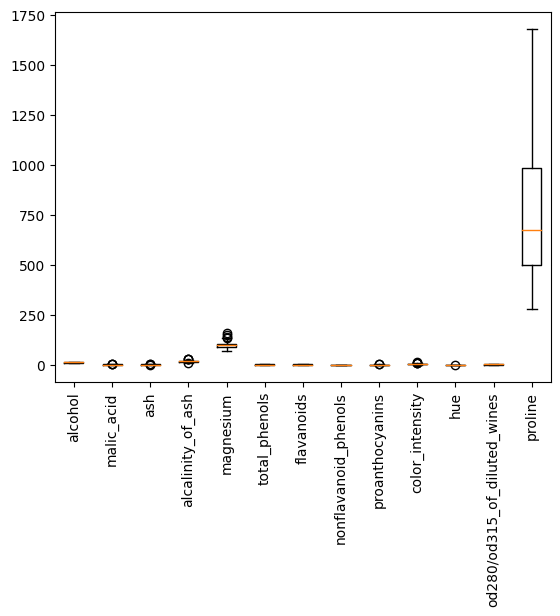

In [50]:
# Exploratory Data Analysis
# Visualize key statistics
## Your code starts here
plt.boxplot(df_original)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13], feature_names, rotation=90)
plt.show()
## Your code ends here

**Question:** What do you see? What is the problem?

**You Answer:** Type your answer here!
The x values are not labeled so it is difficult to understand what the graph is showing. The data in x plot 1-12 is hard to distinguish its values.
---



# Data Standardization:
**Coding excersice:** Standardize the original data (i.e., dataframe without considering data quality issues) and use the same boxplot to visualize the standardized data!

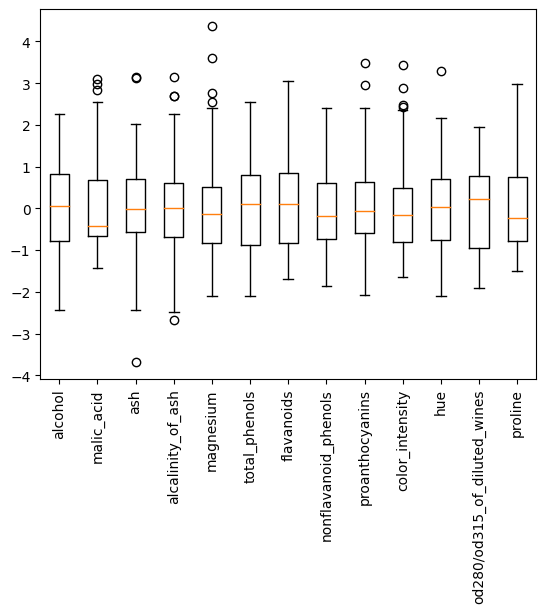

In [51]:
# Standardize the data
## Your code starts here


""" Put the standardized data back into dataframe"""
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_original)

## Your code ends here

# Exploratory Data Analysis
# Visualize key statistics
## Your code starts here
""" Use boxplot to show visualize the standardized features """
plt.boxplot(df_standardized)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13], feature_names, rotation=90)
plt.show()
## Your code ends here

**Question:** Was the problem resolved?

**You Answer:** I can now see the boxplots for all the x plots. It is easiers to read the minimum, first quartile, median, third quartile, and maximum.
---



**Coding excersice:** Calculate correlation matrix and visualize it?

In [52]:
# Calculate correlation matrix
## Your code starts here
correlation_m = pd.DataFrame(df_standardized).corr()

# Visualize correlation matrix

correlation_m
## Your code ends here

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


What is the intuition behind the correlation matrix?

**Your answer:** The intuition behind the correlation matrix is how the variables are related to each other. This shows how much the variables are similar and different. This allows data analysts to 

---



# Dimensionality Reduction with PCA
**Coding excersice:** Apply Dimensionality Reduction using PCA. Find the number of principle components to retain using the "explained_variance_ratio". Use the threshold of **0.95** for the cumulative explained variance ratio in order to find the number of principle components.

**Note:** When performing dimensionality reduction using PCA, one of the main considerations is to select the appropriate number of principal components to retain. The explained variance ratio tells us the proportion of variance explained by each principal component. By summing up the explained variance ratios cumulatively, we can see how much of the total variance in the data is explained as we include more principal components.

List of retained principal components
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]



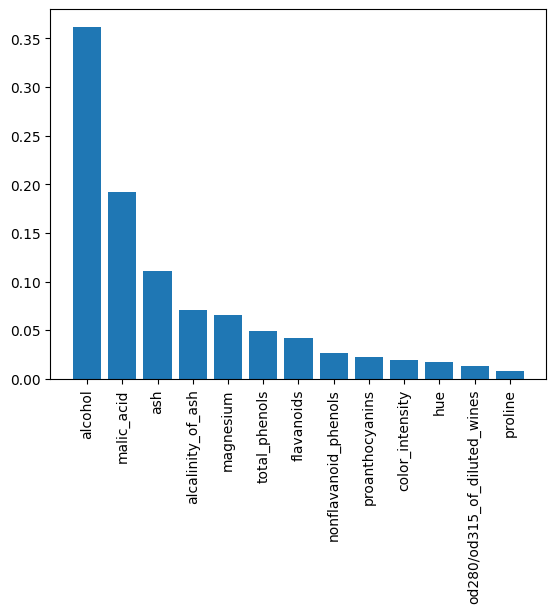

Cumulative sum of variance ratios
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]
Explained variance ratio of each principal component:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153]
Summary:
PCA captures 94.23969775056236% of the variance with 9 components.


In [53]:
# Dimensionality Reduction using PCA
# Apply PCA
## Your code starts here

"""Initialize PCA with a default value which is the total number of components"""
pca = PCA()
std_pca = pca.fit_transform(df_standardized)
## Your code ends here

# Determine the number of principal components to retain
## Your code starts here
retain = pca.explained_variance_ratio_
print("List of retained principal components")
print(retain)
print()
## Your code ends here

# Plot explained variance ratio
## Your code starts here 

"""Makes a list of numbers to label the x-axis"""
x_label = []
for i in range(retain.size):
    x_label.append(i)

plt.bar(feature_names, retain)
plt.xticks(rotation=90)
plt.show()
## Your code ends here

# Choose the number of components based on the explained variance ratio
## Your code starts here
"""This shows what number of components we need with the threshold of 0.95"""
print("Cumulative sum of variance ratios")
Cum_sum_pca = pca.explained_variance_ratio_.cumsum()
print(Cum_sum_pca)

"""Variables to find the cumulative sum and the threshold size for 95%"""
cumulative_sum = 0
best_comp_size = 0
"""Loops through the list of cumulative values and finds the sum before 95% and records the number of components needed to 
get that value"""
for sum in Cum_sum_pca:
    if sum < 0.95:
        cumulative_sum = sum
        best_comp_size += 1
## Your code ends here

# Perform PCA with the chosen number of components
## Your code starts here
"""Create another PCA instance with the best cumulative size"""
new_pca = PCA(n_components=best_comp_size)
std_pca = new_pca.fit_transform(df_standardized)
## Your code ends here

# Interpretation and Conclusion
# Interpret principal components
print("Explained variance ratio of each principal component:")
## Your code starts here
"""Calculates the explained variance ratio again but with a certain number of components"""
retain = new_pca.explained_variance_ratio_
print(retain)
## Your code ends here

# Summarize key findings
print("Summary:")
""" write your code inside the .format()!"""
print("PCA captures {}% of the variance with {} components.".format(cumulative_sum*100, best_comp_size))

**Congratulations!** You completed this assignment.


# Submission Guidelines:

* Implement the above steps in a Jupyter Notebook file.
* Save your ipython code and name it as: lastname_firstname_HW1.ipynb (.ipynb extension)
* Include comments and explanations to describe your approach and the rationale behind each step.
* Submit on Canvas.

